In [1]:
import pandas as pd
import numpy as np

from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import shap
from   interpret.glassbox import ExplainableBoostingRegressor

In [2]:
 wine = pd.read_csv('wine.csv')
 y = wine['quality']
 X = wine.drop(['quality'], axis=1)
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [3]:
model = ExplainableBoostingRegressor()
model.fit(X_train, y_train)

ExplainableBoostingRegressor()

In [4]:
y_pred = model.predict(X_test)
mae    = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 0.52


In [5]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 981it [00:40, 21.96it/s]                         


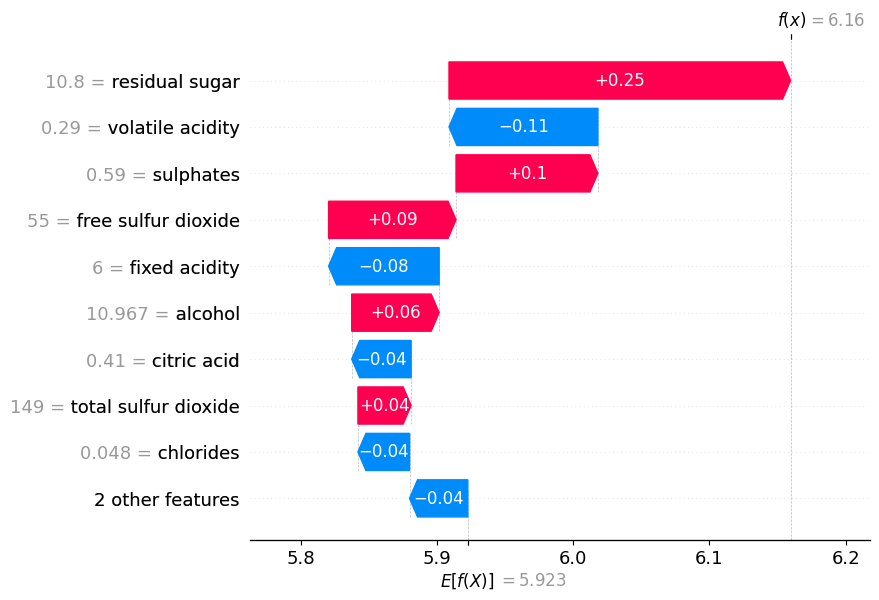

In [6]:
shap.plots.waterfall(shap_values[0], max_display=10)

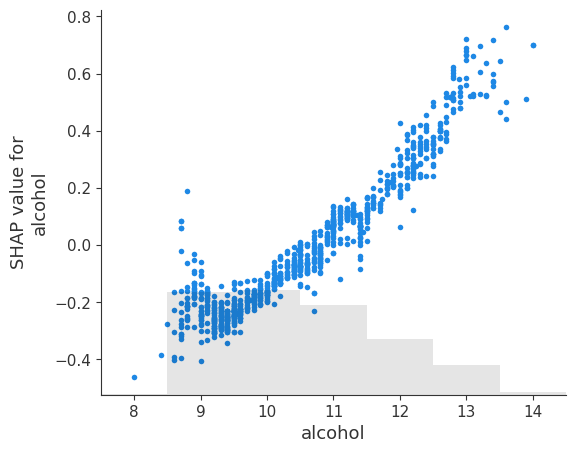

In [7]:
shap.plots.scatter(shap_values[:, 'alcohol'])

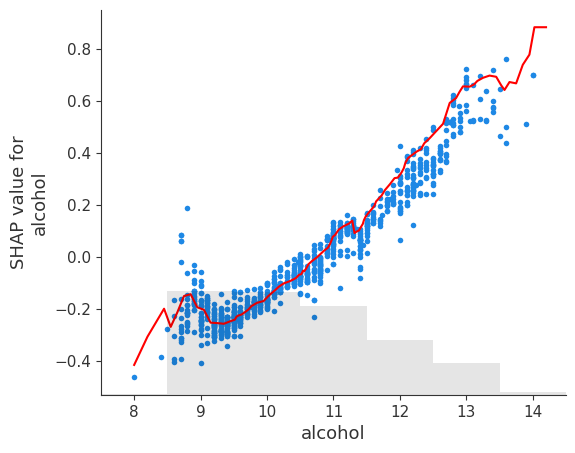

In [30]:
shap.plots.scatter(shap_values[:, 'alcohol'], show=False)
idx = model.explain_global().data()['names'].index('alcohol') #idx = 10
explain_data = model.explain_global().data(idx)
x_data = explain_data['names']
y_data = explain_data['scores']
y_data = np.r_[y_data, y_data[-1]] # adds the last datapoint to y_data to make x_data and y_data same length
plt.plot(x_data, y_data, color='red')

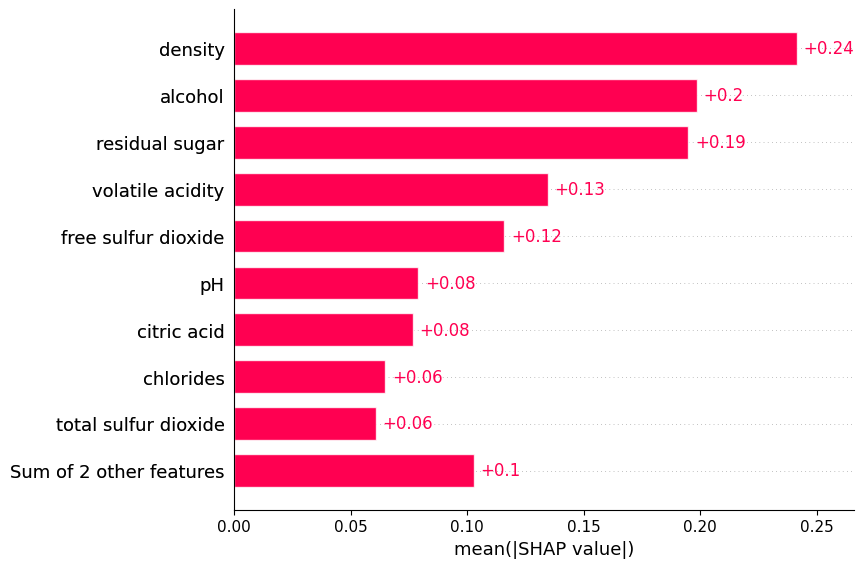

In [36]:
shap.plots.bar(shap_values)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'fixed acidity & pH',
 'volatile acidity & residual sugar',
 'volatile acidity & chlorides',
 'volatile acidity & density',
 'volatile acidity & alcohol',
 'residual sugar & pH',
 'residual sugar & alcohol',
 'total sulfur dioxide & sulphates',
 'density & pH',
 'pH & alcohol']